In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats.distributions import chi2
from os import listdir
import matplotlib as mpl
%matplotlib inline

new_rc_params = {'text.usetex': False,
    "svg.fonttype": 'none'
    }
mpl.rcParams.update(new_rc_params)

In [6]:
#Simulated Probability Distribution over States
probs = np.linspace(0, 1., 1000)
simulated_probs = np.random.choice(probs, size = len(election.States), replace = True)

In [6]:
#Simulated Errors on Probabilities
simulated_probs_errs = np.sqrt(simulated_probs)

In [4]:
import election
%load_ext autoreload
%autoreload 2

In [8]:
#Monte Carlo simulation
runs = 100000
test = election.montecarlo(runs, simulated_probs)

  0%|          | 0/100000 [00:00<?, ?it/s]

52.834% Chance of Winning
0.89% Chance of Tie


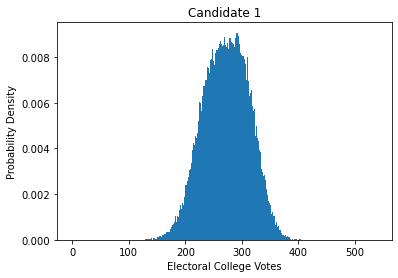

In [17]:
bins = np.linspace(0, 538, 539)
plt.hist(test, bins, density = True)
plt.xlabel('Electoral College Votes')
plt.ylabel('Probability Density')
plt.title('Candidate 1')

victory = 0
tie = 0
for i in range(len(test)):
    if test[i] >= 270:
        victory += 1
    if test[i] == 269:
        tie += 1
victory /= len(test)
tie /= len(test)
print(str(victory * 100) + '% Chance of Winning')
print(str(tie * 100) + '% Chance of Tie')

In [10]:
test2 = election.montecarlo(runs, 1 - simulated_probs)

  0%|          | 0/100000 [00:00<?, ?it/s]

46.342% Chance of Winning
0.898% Chance of Tie


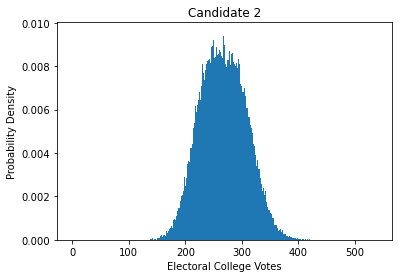

In [16]:
bins = np.linspace(0, 538, 539)
plt.hist(test2, bins, density = True)
plt.xlabel('Electoral College Votes')
plt.ylabel('Probability Density')
plt.title('Candidate 2')

victory2 = 0
tie2 = 0
for i in range(len(test2)):
    if test2[i] >= 270:
        victory2 += 1
    if test2[i] == 269:
        tie2 += 1
victory2 /= len(test2)
tie2 /= len(test2)
print(str(victory2 * 100) + '% Chance of Winning')
print(str(tie2 * 100) + '% Chance of Tie')